# Mobile Price Classification Analysis

## Data Loading and Exploration

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_mobile = pd.read_csv('https://raw.githubusercontent.com/devtlv/DailyChallenge-DataAnalysis-W6D5-Mobile_Price_Classification/main/train.csv')
data = df_mobile.copy()
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Data Cleaning and Preprocessing

In [3]:
# Check for missing or null values in the dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
# checking for duplicated rows
data.duplicated().sum()

0

## Statistical Analysis

In [5]:
# Calculate central tendency measures
central_tendency = {
    'mean': data.mean(),
    'median': data.median(),
    'mode': data.mode().iloc[0]
}

# Calculate variability measures
variability = {
    'range': data.max() - data.min(),
    'variance': data.var(),
    'standard_deviation': data.std()
}

# Calculate skewness and kurtosis
distribution_shape = {
    'skewness': data.skew(),
    'kurtosis': data.kurt()
}

In [6]:
# Convert to DataFrames for better visualization
central_tendency_df = pd.DataFrame(central_tendency)
variability_df = pd.DataFrame(variability)
distribution_shape_df = pd.DataFrame(distribution_shape)

In [7]:
central_tendency_df, variability_df, distribution_shape_df

(                     mean  median    mode
 battery_power  1238.51850  1226.0   618.0
 blue              0.49500     0.0     0.0
 clock_speed       1.52225     1.5     0.5
 dual_sim          0.50950     1.0     1.0
 fc                4.30950     3.0     0.0
 four_g            0.52150     1.0     1.0
 int_memory       32.04650    32.0    27.0
 m_dep             0.50175     0.5     0.1
 mobile_wt       140.24900   141.0   182.0
 n_cores           4.52050     4.0     4.0
 pc                9.91650    10.0    10.0
 px_height       645.10800   564.0   347.0
 px_width       1251.51550  1247.0   874.0
 ram            2124.21300  2146.5  1229.0
 sc_h             12.30650    12.0    17.0
 sc_w              5.76700     5.0     1.0
 talk_time        11.01100    11.0     7.0
 three_g           0.76150     1.0     1.0
 touch_screen      0.50300     1.0     1.0
 wifi              0.50700     1.0     1.0
 price_range       1.50000     1.5     0.0,
                 range      variance  standard_deviat

## Hypothesis Testing

In [8]:
# Hypothesis Testing: Perform t-test for statistical significance between different price ranges

# Group data by price_range
grouped_data = data.groupby('price_range')

# Perform t-test between price_range 0 and 1 for each feature
t_test_results = {}
for column in data.columns:
    if column != 'price_range':
        group0 = grouped_data.get_group(0)[column]
        group1 = grouped_data.get_group(1)[column]
        t_stat, p_value = stats.ttest_ind(group0, group1)
        t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}

# Convert t-test results to DataFrame
t_test_df = pd.DataFrame(t_test_results).T
t_test_df

,t_stat,p_value
battery_power,-4.166133,3.366391e-05
blue,-0.126402,8.994392e-01
clock_speed,1.170807,2.419557e-01
dual_sim,-0.315943,7.521119e-01
fc,-0.931694,3.517202e-01
four_g,-0.189718,8.495690e-01
int_memory,-0.825127,4.094966e-01
m_dep,-1.858610,6.337671e-02
mobile_wt,0.018431,9.852986e-01
n_cores,2.084974,3.732539e-02


## Correlation Analysis

In [9]:
 # Feature-Target Correlations: Calculate correlation coefficients
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)
correlation_with_target

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

## Data Visualization

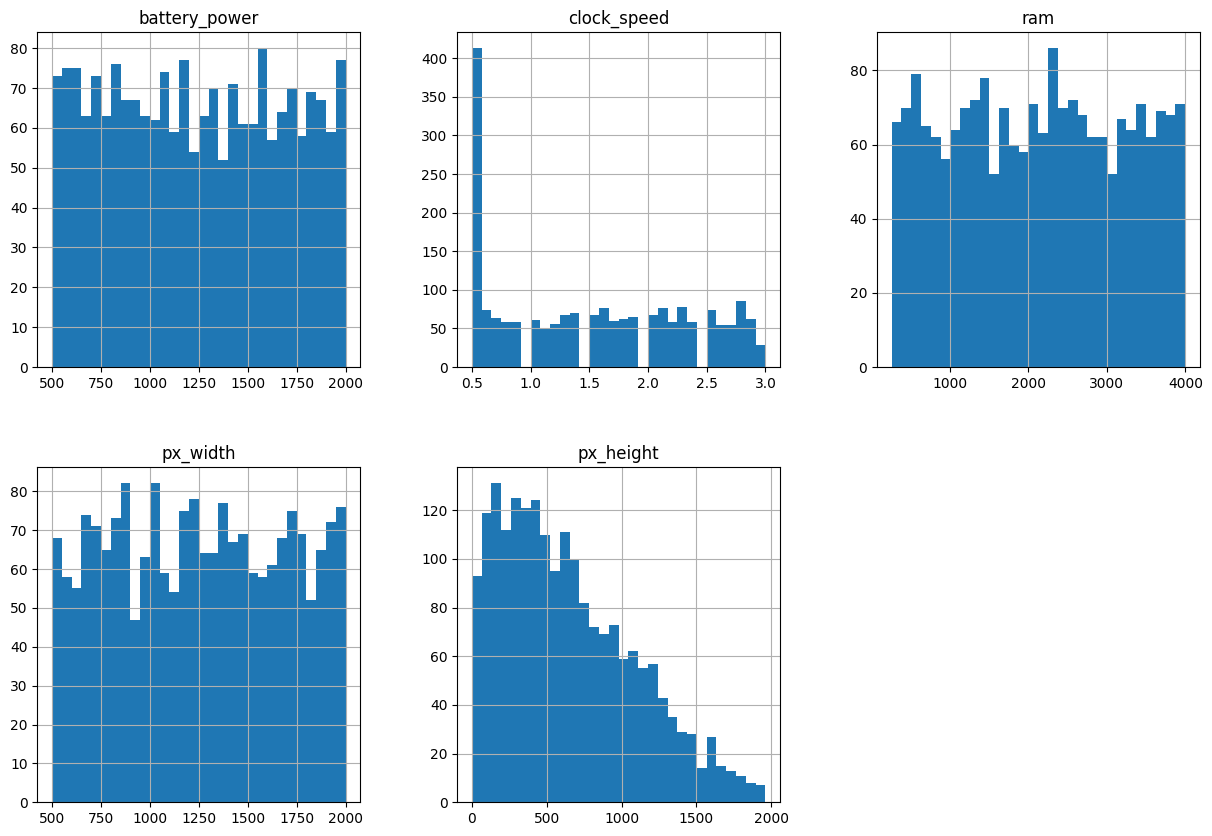

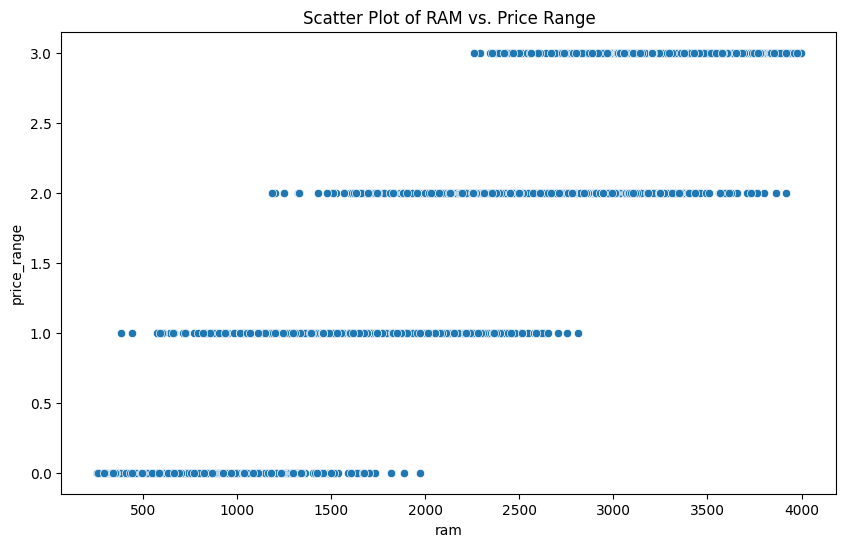

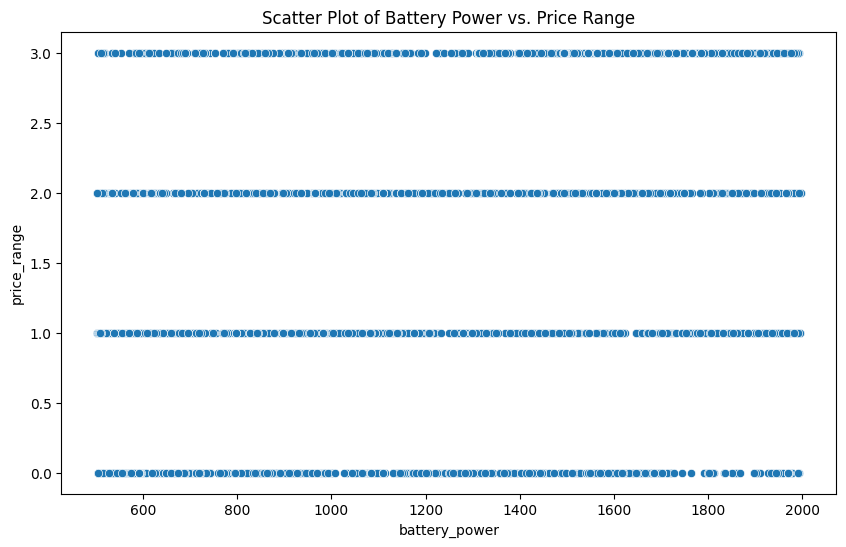

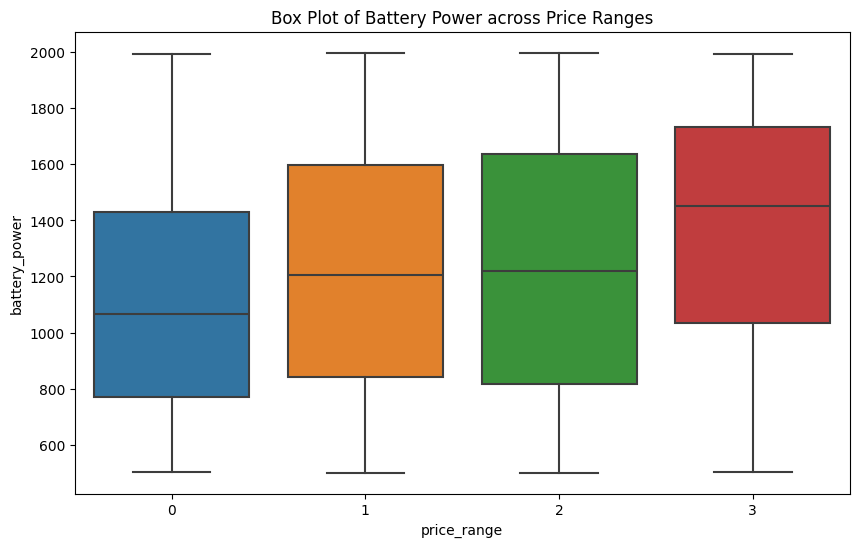

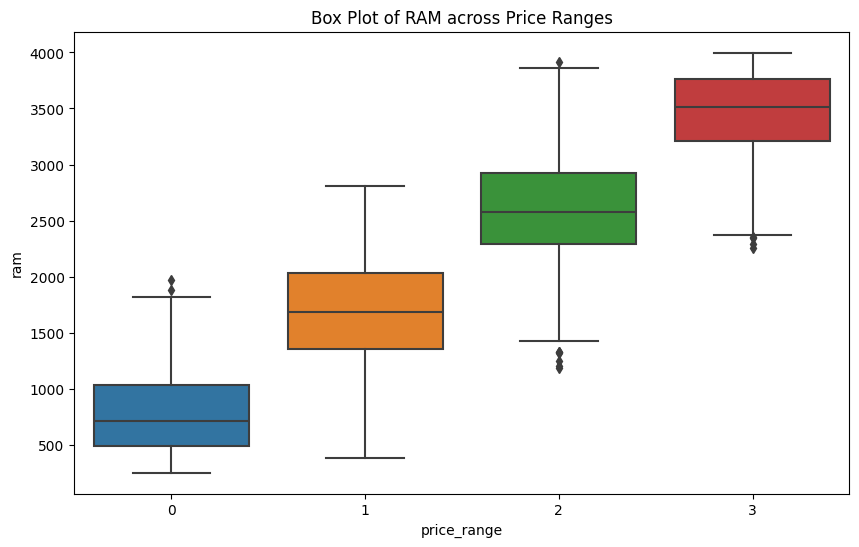

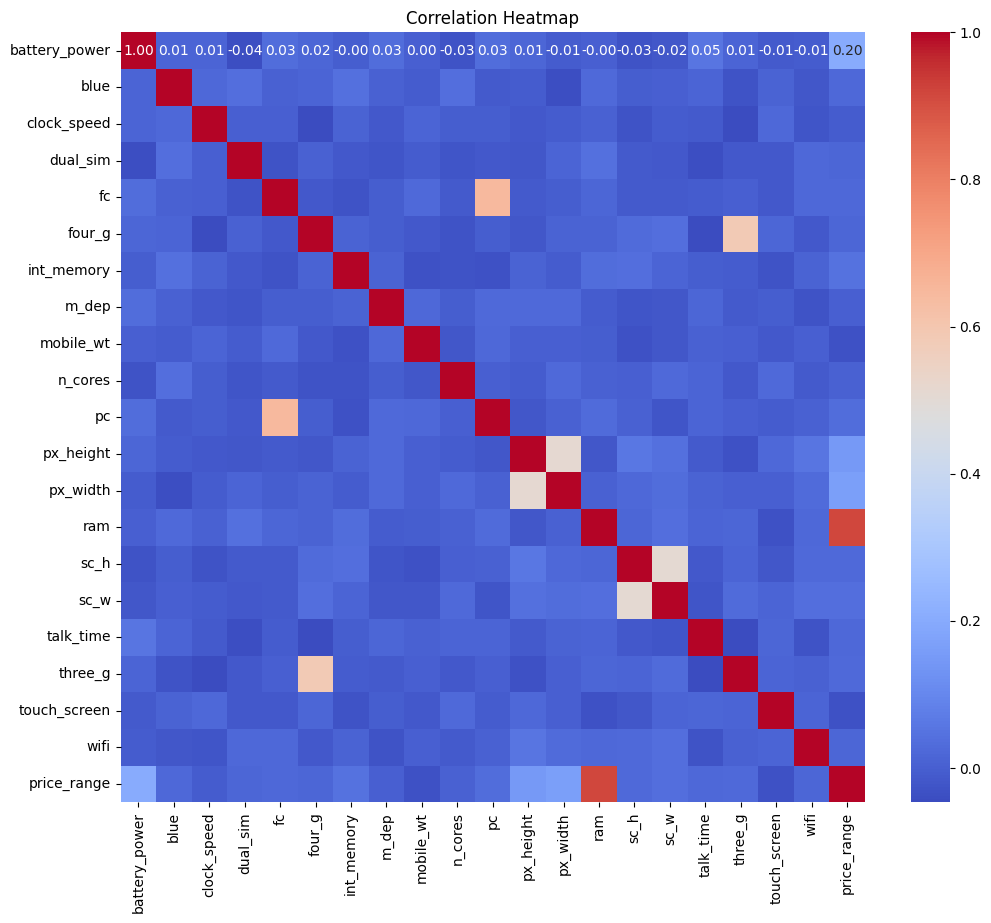

In [10]:
# Histograms for continuous variables
data[['battery_power', 'clock_speed', 'ram', 'px_width', 'px_height']].hist(bins=30, figsize=(15, 10), layout=(2, 3))

# Scatter plots for variables with strong correlations with the target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='price_range', data=data)
plt.title('Scatter Plot of RAM vs. Price Range')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_power', y='price_range', data=data)
plt.title('Scatter Plot of Battery Power vs. Price Range')

# Box plots for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=data)
plt.title('Box Plot of Battery Power across Price Ranges')

plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=data)
plt.title('Box Plot of RAM across Price Ranges')

# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Show all plots
plt.show()